In [1]:
from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
rc('text', usetex=True)

In [2]:
import numpy as np 
from numpy import linalg as LA 

m, n = 2, 3
A = np.random.rand(m, n)

U, S, V = LA.svd(A) 
print 'Frobenius norm of (UU^T - I) =', \
    LA.norm(U.dot(U.T) - np.eye(m))
print '\n', S, '\n'
print 'Frobenius norm of (VV^T - I) =', \
    LA.norm(V.dot(V.T) - np.eye(n))

Frobenius norm of (UU^T - I) = 6.473657049138938e-16

[1.51936677 0.34794048] 

Frobenius norm of (VV^T - I) = 3.236828524569469e-16


# Image Compression 

/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/matplotlib/font_manager.py:1339: UserWarning: findfont: Font family [u'sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


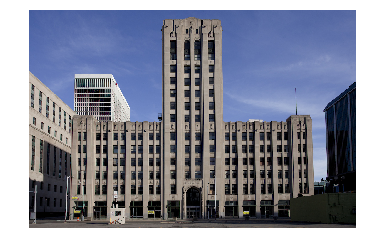

In [3]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans

img = mpimg.imread('building2.JPG')
plt.imshow(img)
imgplot = plt.imshow(img)
plt.axis('off')
plt.show() 

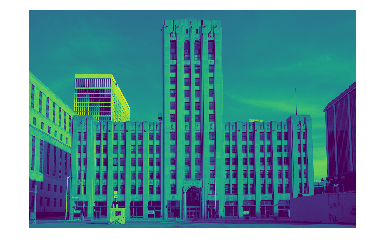

In [4]:
# to gray 
gray = 0.2125* img[:, :, 0] + 0.7154 *img[:, :, 1] + 0.0721 *img[:, :, 2]
plt.imshow(gray)
plt.axis('off')
plt.show()

In [5]:

from numpy import linalg as LA 

U, S, V = LA.svd(gray) 

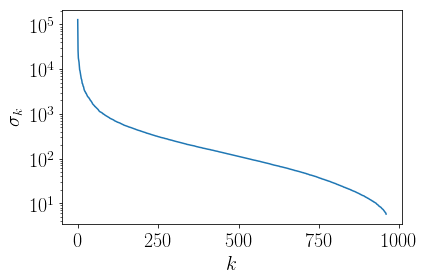

In [7]:
from matplotlib.backends.backend_pdf import PdfPages

with PdfPages('singular_value.pdf') as pdf:
    plt.semilogy(S) 
    plt.xlabel('$k$', fontsize = 20)
    plt.ylabel('$\sigma_k$', fontsize = 20)
    # We change the fontsize of minor ticks label 
    plt.tick_params(axis='both', labelsize=20)
    plt.tight_layout()
    pdf.savefig()
    plt.show()

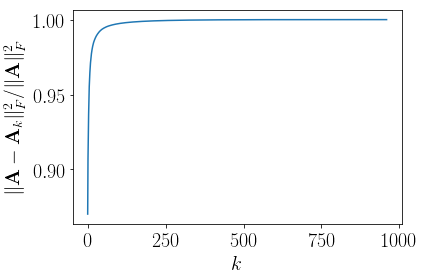

In [8]:
# percentage of preserving energy

with PdfPages('energy_preserved.pdf') as pdf:
    a = np.sum(S**2)
    b = np.zeros_like(S)
    for i in xrange(S.shape[0]):
        b[i] = np.sum(S[:i+1]**2, axis = 0)/a

    plt.plot(b)
    plt.xlabel('$k$', fontsize = 20)
    plt.ylabel('$\|\mathbf{A} - \mathbf{A}_k\|_F^2 / \|\mathbf{A}\|_F^2$', fontsize = 20)
    plt.tick_params(axis='both', which='major', labelsize=20)
    plt.tight_layout()
    pdf.savefig()
    plt.show()
    

In [8]:
## error
e =  1- b

In [30]:
e[100]

0.0026408976933413042

In [16]:

def approx_rank_k(U, S, V, k):
    Uk = U[:, :k]
    Sk = S[:k]
    Vk = V[:k, :]
    return np.around(Uk.dot(np.diag(Sk)).dot(Vk))

# A = gray
# U, S, V = LA.svd(A)
A1 = []
K = [5, 50, 100]
for k in K:
    A1.append(approx_rank_k(U, S, V,k))

In [43]:
for i in range(3):
    plt.imshow(A1[i], cmap = 'gray')
    plt.axis('off')
    label = '$k$ = %d: error = %.4f' %(K[i], e[K[i]])
    plt.title(label, fontsize = 20)
    fn = 'image2_'+str(K[i])+'.pdf'
    with PdfPages(fn) as pdf:
        pdf.savefig(bbox_inches='tight')
    

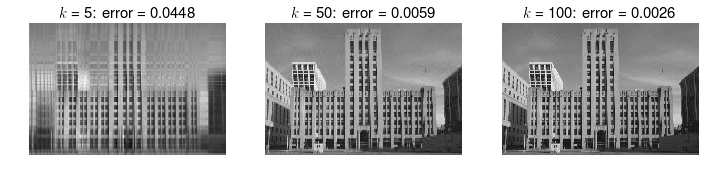

In [40]:
nrows, ncols = 1, 3
width = 4*ncols
height = 4*nrows

plt.close('all')
fig,axs=plt.subplots(nrows,ncols,figsize=(width,height)) 
for i in range(3):
    axs[i].imshow(A1[i], cmap = 'gray')
    axs[i].axis('off')
    label = '$k$ = %d: error = %.4f' %(K[i], e[K[i]])
    axs[i].set_title(label, fontsize = 15)
with PdfPages('image_compressed.pdf') as pdf:
    pdf.savefig(bbox_inches='tight')
plt.show()

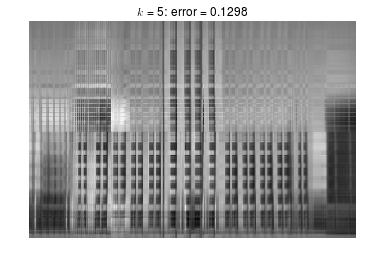

In [39]:
# show animated results
import matplotlib.animation as animation
from matplotlib.animation import FuncAnimation 
fig, ax = plt.subplots()
def update(i):
    ani = plt.cla()
    ani = plt.imshow(A1[i], cmap = 'gray')
    label = '$k$ = %d: error = %.4f' %(5*i + 5, e[i])
    ax.set_xlabel(label)
    ani = plt.axis('off')
    ani = plt.title(label)

    return ani, ax 

anim = FuncAnimation(fig, update, frames=np.arange(0, len(A1)), interval=500)
anim.save('a.gif', dpi = 300, writer = 'imagemagick')
plt.show()

# deslanted

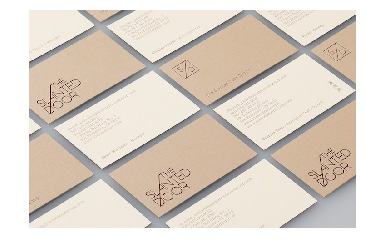

In [10]:
img = mpimg.imread('img0.JPG')
plt.imshow(img)
imgplot = plt.imshow(img)
plt.axis('off')
plt.show() 

In [11]:
gray = 0.2125* img[:, :, 0] + 0.7154 *img[:, :, 1] + 0.0721 *img[:, :, 2]

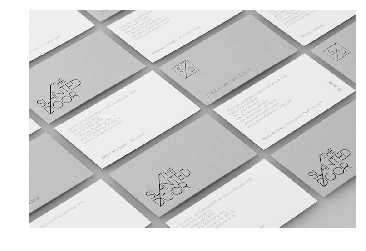

In [12]:
plt.imshow(gray, cmap = 'gray')
plt.axis('off')
plt.show()

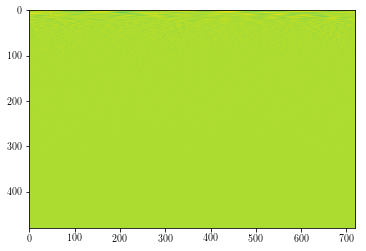

In [22]:
U, S, V = LA.svd(gray) 
img2 = np.around(np.diag(S).dot(V[:480,: ]))
plt.imshow(img2)
plt.show()